In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazonianearth/ade.png
/kaggle/input/amazonpeerj/amazon_peerj.jpg
/kaggle/input/openai-to-z-challenge/README
/kaggle/input/srtmdem/SA_srtm_mosaic_30arcsec_reg_hgt.tif
/kaggle/input/amazon-naturesust/amazon_natSust.png


In [ ]:
!pip install --upgrade openai

**Lets Identify the Study Area**

In [ ]:
import os
import requests

# Define the base URL and filenames
base_url = "https://raw.githubusercontent.com/gamamo/AmazonBasinLimits/master/"
filenames = [
    "amazon_sensulatissimo_gmm_v1.shp",
    "amazon_sensulatissimo_gmm_v1.shx",
    "amazon_sensulatissimo_gmm_v1.dbf",
    "amazon_sensulatissimo_gmm_v1.prj"
]

# Create a directory to store the shapefile components
os.makedirs("amazon_basin_shapefile", exist_ok=True)

# Download each file
for filename in filenames:
    url = base_url + filename
    response = requests.get(url)
    if response.status_code == 200:
        with open(os.path.join("amazon_basin_shapefile", filename), "wb") as f:
            f.write(response.content)
        print(f"Downloaded {filename}")
    else:
        print(f"Failed to download {filename}")


Downloaded amazon_sensulatissimo_gmm_v1.shp
Downloaded amazon_sensulatissimo_gmm_v1.shx
Downloaded amazon_sensulatissimo_gmm_v1.dbf
Downloaded amazon_sensulatissimo_gmm_v1.prj


In [ ]:
import geopandas as gpd

# Define the path to the .shp file
shapefile_path = "amazon_basin_shapefile/amazon_sensulatissimo_gmm_v1.shp"

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Display the first few rows
gdf.head()


,Id,area,geometry
0,0,0.46,"POLYGON ((-64.37961 -20.20885, -64.38048 -20.2..."
1,0,0.53,"POLYGON ((-64.38048 -20.20210, -64.38372 -20.2..."
2,0,0.01,"POLYGON ((-77.90818 0.20184, -77.90818 0.20762..."
3,0,0.78,"POLYGON ((-77.80988 0.31769, -77.80823 0.32050..."
4,0,0.29,"POLYGON ((-77.77430 0.40472, -77.77399 0.40869..."


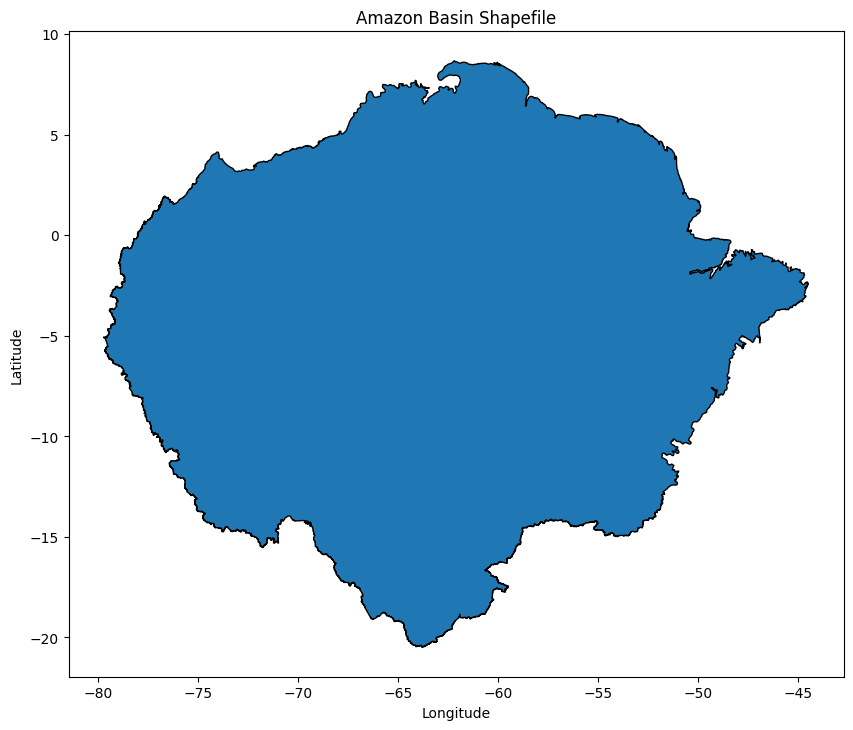

In [ ]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
gdf.plot(figsize=(10, 10), edgecolor='black')
plt.title("Amazon Basin Shapefile")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# **Extracting Archeological Site Geolocations From Published Maps**

**Geolocations of Archaeological Sites**

In [ ]:
import os

print("Files in /kaggle/input/amazonpeerj/:")
for f in os.listdir("/kaggle/input/amazonpeerj/"):
    print("•", f)


In [ ]:
import os

print("Files in /kaggle/input/amazon-naturesust/:")
for f in os.listdir("/kaggle/input/amazon-naturesust/"):
    print("•", f)

Files in /kaggle/input/amazon-naturesust/:
• amazon_natSust.png


In [ ]:
/kaggle/input/amazonianearth/ade.png

In [ ]:
import os

print("Files in /kaggle/input/amazonianearth:")
for f in os.listdir("/kaggle/input/amazonianearth"):
    print("•", f)



Files in /kaggle/input/amazonianearth:
• ade.png


In [ ]:
import cv2
import matplotlib.pyplot as plt

# ✅ Correct file path
img_path = "/kaggle/input/amazonpeerj/amazon_peerj.jpg"

# Load the image
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title("PeerJ Map - ADE / Earthwork / Other")
plt.axis("off")
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

# ✅ Correct file path
img_path = "/kaggle/input/amazon-naturesust/amazon_natSust.png"

# Load the image
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title("Nature Sustainability / Ceremonial /Mound")
plt.axis("off")
plt.show()

agroforestry- https://www.nature.com/articles/s41477-018-0205-y#Sec24

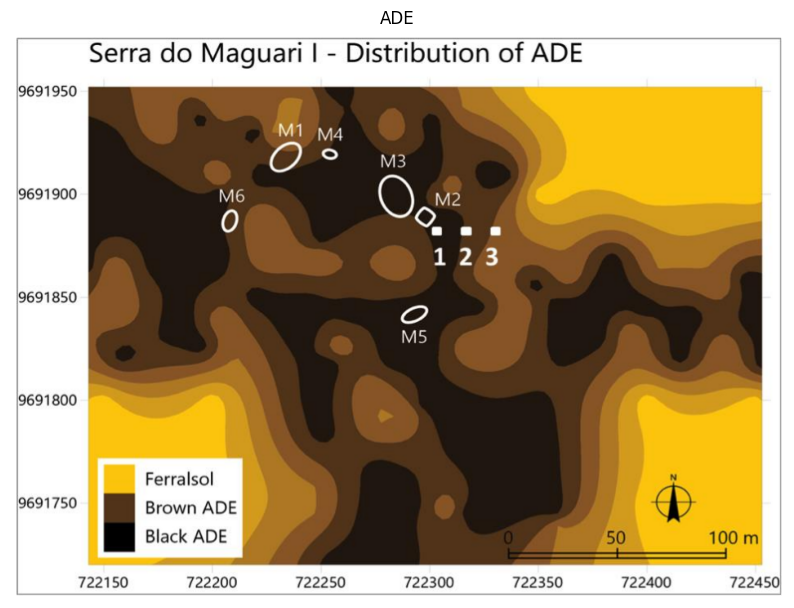

In [ ]:
import cv2
import matplotlib.pyplot as plt

# ✅ Correct file path
img_path = "/kaggle/input/amazonianearth/ade.png"

# Load the image
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title("ADE")
plt.axis("off")
plt.show()

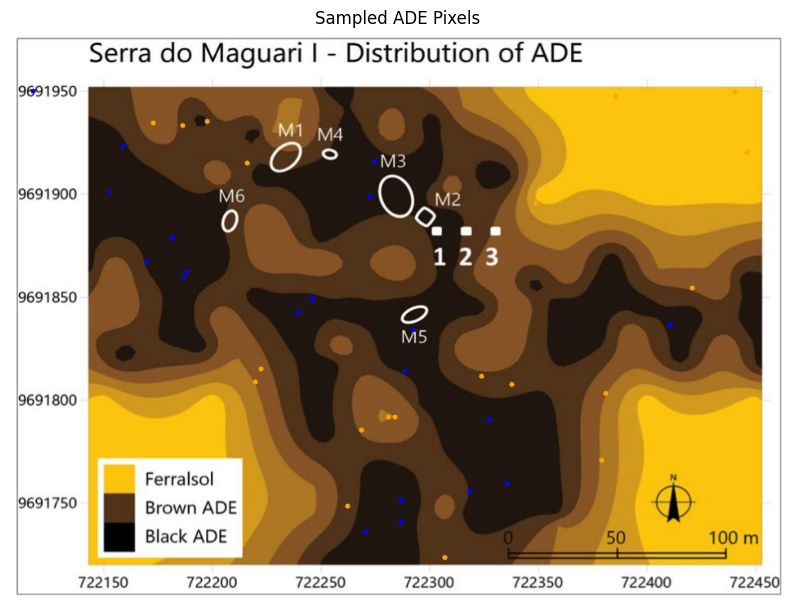

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load image
img_path = "/kaggle/input/amazonianearth/ade.png"
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Define HSV color thresholds for Brown and Black ADE
# These are approximate and may need tuning
brown_lower = np.array([10, 50, 50])
brown_upper = np.array([30, 255, 255])

black_lower = np.array([0, 0, 0])
black_upper = np.array([180, 255, 50])

# Create masks
mask_brown = cv2.inRange(img_hsv, brown_lower, brown_upper)
mask_black = cv2.inRange(img_hsv, black_lower, black_upper)

# Find pixel coordinates for each mask
brown_coords = np.column_stack(np.where(mask_brown > 0))
black_coords = np.column_stack(np.where(mask_black > 0))

# Randomly sample 20 pixels each
np.random.seed(42)
brown_samples = brown_coords[np.random.choice(len(brown_coords), 20, replace=False)]
black_samples = black_coords[np.random.choice(len(black_coords), 20, replace=False)]

# Combine into a DataFrame
brown_df = pd.DataFrame(brown_samples, columns=['y', 'x'])
brown_df['archaeologicalType'] = 'ADE_brown'

black_df = pd.DataFrame(black_samples, columns=['y', 'x'])
black_df['archaeologicalType'] = 'ADE_black'

combined_df = pd.concat([brown_df, black_df], ignore_index=True)

# Show overlay (optional)
overlay = img_rgb.copy()
for y, x in brown_samples:
    cv2.circle(overlay, (x, y), 3, (255, 165, 0), -1)
for y, x in black_samples:
    cv2.circle(overlay, (x, y), 3, (0, 0, 255), -1)

plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.title("Sampled ADE Pixels")
plt.axis("off")
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyproj import Transformer

# Load image
img_path = "/kaggle/input/amazonianearth/ade.png"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, _ = img.shape

# Sample points visually identified as black or brown ADE
# Format: (x_pixel, y_pixel, class_label)
sample_points = [
    (100, 120, "black_ade"), (150, 160, "black_ade"), (200, 180, "black_ade"),
    (250, 220, "brown_ade"), (300, 250, "brown_ade"), (350, 270, "brown_ade")
    # Add more based on your sampling
]

# Map pixel to UTM
x_min, x_max = 722150, 722450
y_min, y_max = 9691750, 9691950

utm_coords = []
for x_pix, y_pix, label in sample_points:
    x_utm = x_min + (x_pix / width) * (x_max - x_min)
    y_utm = y_max - (y_pix / height) * (y_max - y_min)
    utm_coords.append((x_utm, y_utm, label))

# Convert UTM to lat/lon (assume UTM zone 21S)
transformer = Transformer.from_crs("EPSG:32721", "EPSG:4326", always_xy=True)

geo_points = []
for x_utm, y_utm, label in utm_coords:
    lon, lat = transformer.transform(x_utm, y_utm)
    geo_points.append((lat, lon, label))

# Save as DataFrame
ade_df = pd.DataFrame(geo_points, columns=["lat", "lon", "archaeologicalType"])

# Export CSV for prompt/vision model use
ade_df.to_csv("ade_samples_latlon.csv", index=False)

# Optionally preview
print(ade_df.head())


        lat        lon archaeologicalType
0 -2.785612 -55.001370          black_ade
1 -2.785716 -55.001228          black_ade
2 -2.785768 -55.001085          black_ade
3 -2.785872 -55.000943          brown_ade
4 -2.785950 -55.000801          brown_ade


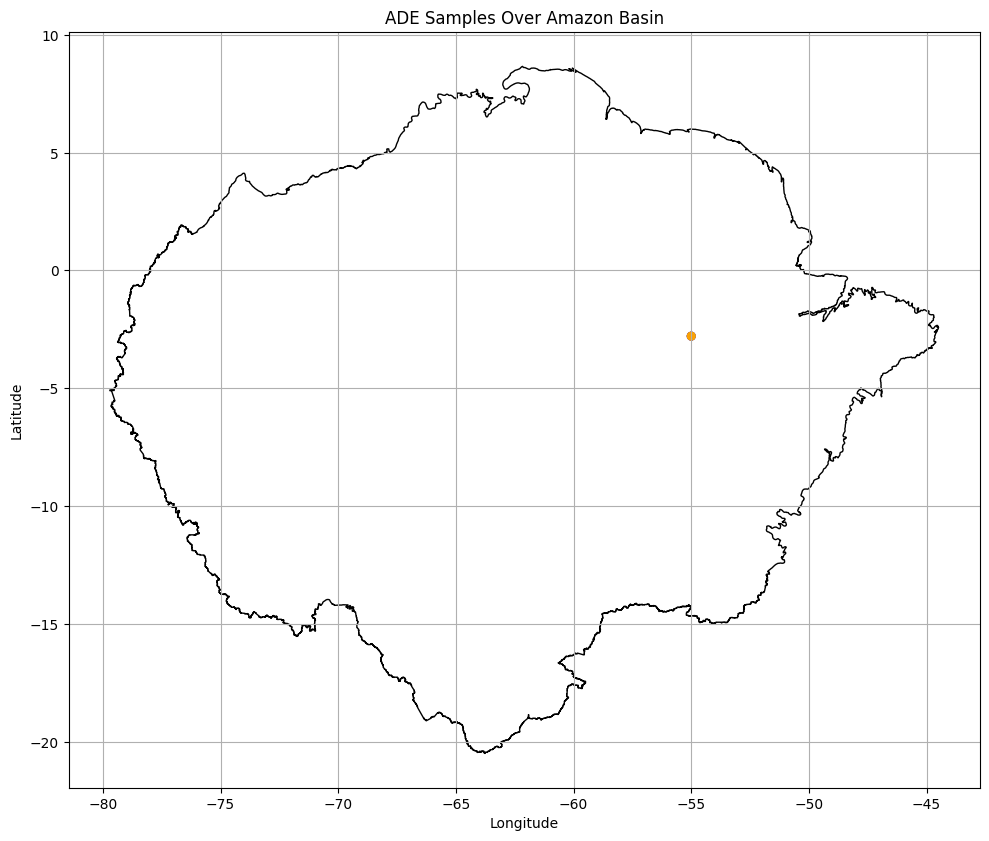

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert ade_df to GeoDataFrame
ade_df["geometry"] = ade_df.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
ade_gdf = gpd.GeoDataFrame(ade_df, geometry="geometry", crs="EPSG:4326")

# Plot Amazon basin and ADE points
fig, ax = plt.subplots(figsize=(10, 10))
gdf.to_crs(epsg=4326).plot(ax=ax, color='white', edgecolor='black')

# Color by archaeologicalType
color_map = {
    "black_ade": "blue",
    "brown_ade": "orange"
}
ade_gdf.plot(
    ax=ax,
    color=ade_gdf["archaeologicalType"].map(color_map),
    markersize=30,
    alpha=0.7
)

plt.title("ADE Samples Over Amazon Basin")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(len(ade_df))  # Should be 20
print(ade_df['archaeologicalType'].value_counts())


6
archaeologicalType
black_ade    3
brown_ade    3
Name: count, dtype: int64


In [ ]:
import cv2
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Load PeerJ and Nature images
# ----------------------------

peerj_img_path = "/kaggle/input/amazonpeerj/amazon_peerj.jpg"
nature_img_path = "/kaggle/input/amazonpeerj/amazon_peerj.jpg"  # <- upload & update this path

peerj_bgr = cv2.imread(peerj_img_path)
nature_bgr = cv2.imread(nature_img_path)

peerj_rgb = cv2.cvtColor(peerj_bgr, cv2.COLOR_BGR2RGB)
nature_rgb = cv2.cvtColor(nature_bgr, cv2.COLOR_BGR2RGB)

peerj_hsv = cv2.cvtColor(peerj_rgb, cv2.COLOR_RGB2HSV)
nature_hsv = cv2.cvtColor(nature_rgb, cv2.COLOR_RGB2HSV)

# ----------------------------
# Step 2: Define HSV ranges for both maps
# ----------------------------

color_ranges = {
    "ADE": ([100, 100, 50], [135, 255, 255]),         # blue (PeerJ)
    "earthwork": ([0, 120, 120], [10, 255, 255]),     # red (PeerJ & Nature)
    "other": ([0, 0, 60], [180, 30, 160]),            # gray (PeerJ)
    "ceremonial": ([0, 120, 120], [10, 255, 255]),    # red (Nature)
    "ring_village": ([90, 50, 50], [120, 255, 255]),  # cyan-blue (Nature)
    "platform_mound": ([25, 100, 100], [35, 255, 255]), # yellow (Nature)
    "fortified": ([0, 0, 0], [0, 0, 0])               # placeholder if needed
}

# ----------------------------
# Step 3: Digitize points per class from each image
# ----------------------------

def extract_dots_from_image(hsv_img, label, hsv_range, n=100):
    lower, upper = map(np.array, hsv_range)
    mask = cv2.inRange(hsv_img, lower, upper)
    coords = cv2.findNonZero(mask)
    results = []

    if coords is not None:
        coords = coords.reshape(-1, 2)
        np.random.shuffle(coords)
        for x, y in coords[:n]:
            results.append({"label": label, "x": x, "y": y})
    return results

# PeerJ labels
peerj_dots = []
peerj_labels = ["ADE", "earthwork", "other"]
for label in peerj_labels:
    peerj_dots.extend(extract_dots_from_image(peerj_hsv, label, color_ranges[label]))

# Nature labels
nature_dots = []
nature_labels = ["ceremonial", "ring_village", "platform_mound"]
for label in nature_labels:
    nature_dots.extend(extract_dots_from_image(nature_hsv, label, color_ranges[label]))

# ----------------------------
# Step 4: Convert pixel to lat/lon for both images
# ----------------------------

def pixel_to_latlon(x, y, img_w, img_h, lon_min, lon_max, lat_min, lat_max):
    lon = lon_min + (x / img_w) * (lon_max - lon_min)
    lat = lat_max - (y / img_h) * (lat_max - lat_min)
    return lat, lon

# PeerJ image lat/lon bounds
ph, pw = peerj_rgb.shape[:2]
peerj_extent = (-80, -45, -20, 10)

for d in peerj_dots:
    d["lat"], d["lon"] = pixel_to_latlon(d["x"], d["y"], pw, ph, *peerj_extent)
    d["source"] = "PeerJ"

# Nature image lat/lon bounds (estimated from axis)
nh, nw = nature_rgb.shape[:2]
nature_extent = (-80, -45, -20, 10)  # update if needed

for d in nature_dots:
    d["lat"], d["lon"] = pixel_to_latlon(d["x"], d["y"], nw, nh, *nature_extent)
    d["source"] = "Nature"

# ----------------------------
# Step 5: Combine, create GeoDataFrame, and clip to basin
# ----------------------------

all_dots = pd.DataFrame(peerj_dots + nature_dots)
geometry = [Point(lon, lat) for lon, lat in zip(all_dots["lon"], all_dots["lat"])]
gdf_all = gpd.GeoDataFrame(all_dots, geometry=geometry, crs="EPSG:4326")

# Filter to basin
gdf_clipped = gdf_all[gdf_all.geometry.within(gdf.unary_union)]

# ----------------------------
# Step 6: Plot
# ----------------------------

fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, edgecolor='black', facecolor='none')
gdf_clipped.plot(ax=ax, column="label", cmap="tab10", legend=True, markersize=30)

plt.title("Digitized PeerJ + Nature Sustainability Points (Clipped to Basin)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


**Topography**

In [ ]:
import requests

# Updated bounding box for Santarém region, Lower Amazon
min_x, min_y = -55.5, -3.5
max_x, max_y = -54.5, -2.5

API_KEY = "4ed4e9ce54fbb966b95b9c9fd29c7e3f"
BASE_URL = "https://portal.opentopography.org/API/datasetList?"

params = {
    "south": min_y,
    "north": max_y,
    "west": min_x,
    "east": max_x,
    "apiKey": API_KEY
}

response = requests.get(BASE_URL, params=params)

if response.status_code == 200:
    data = response.json()
    datasets = data.get("Datasets", [])
    print(f"✅ Found {len(datasets)} datasets\n")
    for i, ds in enumerate(datasets, 1):
        print(f"{i}. {ds['name']} ({ds['shortName']})")
        print(f"   DOI: {ds['doi']}")
        print(f"   URL: {ds['metadataLink']}")
        print(f"   Area: {ds.get('area', 'N/A')} km²")
        print(f"   Date Collected: {ds.get('collectionDate', 'Unknown')}")
        print()
else:
    print(f"❌ Error: {response.status_code}")
    print(response.text)
